In [1]:
#load the data
import torch
#import imgaug as ia
#import imgaug.augmenters as iaa
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from load_data import load_images
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt
from torchvision import transforms       
init_transforms = transforms.Compose(
                                [transforms.CenterCrop(128)])

tensor_x, tensor_y, tensor_x_test, tensor_y_test = load_images()




print(tensor_x.shape)
tensor_x = init_transforms(tensor_x) /255
tensor_y = init_transforms(tensor_y) / 255
tensor_x_test = init_transforms(tensor_x_test) / 255
tensor_y_test = init_transforms(tensor_y_test) / 255
print(tensor_x.shape)


my_dataset = TensorDataset(tensor_x,tensor_y) # create your datset

my_dataset_test = TensorDataset(tensor_x_test,tensor_y_test) # create your datset
my_dataloader = DataLoader(my_dataset,shuffle=True,batch_size=5)#, batch_size=1) # create your dataloader
my_dataloader_test = DataLoader(my_dataset_test)


torch.Size([40, 231, 231])
torch.Size([40, 128, 128])


In [ ]:
a_transform = transforms.ToPILImage()
a_transform(tensor_x[0,:,:]).show()
tensor_x.shape[0]

In [2]:
class Net(nn.Module):
    def __init__(self):
      super(Net, self).__init__()
      self.conv_stack =nn.Sequential(
        nn.Conv2d(1,32,3,stride=1,padding=1),
        nn.MaxPool2d((2,2),stride=2),
        nn.ReLU(),
        nn.Conv2d(32,128,3,stride=1,padding=1),
        nn.MaxPool2d((2,2),stride=2),
        nn.ReLU(),
        ##nn.Conv2d(256,512,3,stride=1,padding=1),
        ##nn.MaxPool2d((2,2),stride=2),
        #nn.ReLU(),
        #nn.ConvTranspose2d(512,256,4,stride=2,padding=1),
        #nn.Conv2d(256,256,3,stride=1,padding=1),
        #nn.ReLU(),
        nn.ConvTranspose2d(128,128,2,stride=2,padding=0),
        nn.Conv2d(128,32,3,stride=1,padding=1),
        nn.ReLU(),
        nn.ConvTranspose2d(32,32,2,stride=2,padding=0),
        #nn.ReLU(),
        #nn.Conv2d(64,128,3,stride=1,padding=1),
        nn.Conv2d(32,1,1,stride=1,padding=0),
        
        #nn.ReLU(),
        nn.Sigmoid()
        
        #nn.Softmax(dim=1)
        #nn.Softmax()
      )
    def forward(self, x):
      # Use the rectified-linear activation function over x
      output=self.conv_stack(x)
      # Apply softmax to x
      #output = F.log_softmax(x, dim=1)
      return output

my_nn = Net()
print(my_nn)

Net(
  (conv_stack): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): ReLU()
    (3): Conv2d(32, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): ReLU()
    (6): ConvTranspose2d(128, 128, kernel_size=(2, 2), stride=(2, 2))
    (7): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): ConvTranspose2d(32, 32, kernel_size=(2, 2), stride=(2, 2))
    (10): Conv2d(32, 1, kernel_size=(1, 1), stride=(1, 1))
    (11): Sigmoid()
  )
)


In [4]:
costval = []
test_accuracy_list =[]
f1_scores = []
my_nn = Net()

criterion = nn.BCELoss()
#criterion = nn.BCEWithLogitsLoss()
#criterion = nn.CrossEntropyLoss()
#criterion = nn.MSELoss()
optimizer = torch.optim.Adam(my_nn.parameters())#,lr=0.3)
epochs=100

for j in range(epochs):
  print(j,"-------------------------------------------------")
  for i,(x_train,y_train) in enumerate(my_dataloader):
    x_train = torch.unsqueeze(x_train,1)
    y_pred = my_nn.forward(x_train)
    y_pred = torch.squeeze(y_pred)
    #print(y_pred.shape)
    #print(y_train.shape)
    #print(y_pred[0])
    #print(y_train[0])
    cost = criterion(y_pred,y_train)

    #backprop
    optimizer.zero_grad()
    #cost.mean().backward()
    cost.backward()
    optimizer.step()
  #costval.append(cost)
  #print(cost)

  accuracy=test_acc(my_nn,my_dataloader_test)
  #f1_s = f1(my_nn,my_dataloader_test)
  print("cost,MSE,F1:",cost,accuracy)#,f1_s)
  costval.append(cost)
  test_accuracy_list.append(accuracy)
  #f1_scores.append(f1_s)

0 -------------------------------------------------
cost,MSE,F1: tensor(0.4665, grad_fn=<BinaryCrossEntropyBackward0>) 0.9156585693359375
1 -------------------------------------------------
cost,MSE,F1: tensor(0.3073, grad_fn=<BinaryCrossEntropyBackward0>) 0.9156585693359375
2 -------------------------------------------------
cost,MSE,F1: tensor(0.2862, grad_fn=<BinaryCrossEntropyBackward0>) 0.9156585693359375
3 -------------------------------------------------
cost,MSE,F1: tensor(0.2288, grad_fn=<BinaryCrossEntropyBackward0>) 0.9156585693359375
4 -------------------------------------------------
cost,MSE,F1: tensor(0.2549, grad_fn=<BinaryCrossEntropyBackward0>) 0.9156585693359375
5 -------------------------------------------------
cost,MSE,F1: tensor(0.1309, grad_fn=<BinaryCrossEntropyBackward0>) 0.9156585693359375
6 -------------------------------------------------
cost,MSE,F1: tensor(0.1422, grad_fn=<BinaryCrossEntropyBackward0>) 0.93045654296875
7 ----------------------------------

KeyboardInterrupt: 

torch.Size([128, 128])
torch.Size([1, 128, 128])
1.0


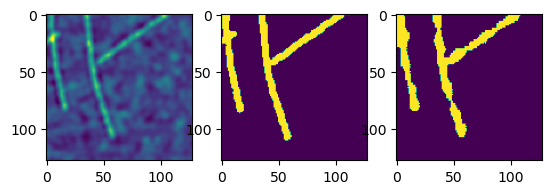

In [5]:
fig=0
x_test = tensor_x_test[fig]#.detach().numpy()
print(x_test.shape)
x_test = torch.unsqueeze(x_test,0)
print(x_test.shape)
y_pred = my_nn.forward(x_test)
y_pred=y_pred.detach().numpy()
y_pred=convToBinary(y_pred)
target = tensor_y_test[fig]
print(np.max(y_pred))
#target = target.detach().numpy()
#y_pred = np.reshape(y_pred,(128,128,2))
plt.subplot(1, 3, 1)
plt.imshow(x_test[0,:,:])

plt.subplot(1, 3, 2)
plt.imshow(target[:,:])
plt.subplot(1, 3, 3)
plt.imshow(y_pred[0,:,:])
#plt.imshow(target)

In [3]:
#ACCURACY FUNCTION
#Sörensen-Dice
from sklearn.metrics import f1_score
def f1(my_nn,my_dataloader_test):
        totalScore = 0
        for i,(x_test,y_test) in enumerate(my_dataloader_test):
                y_pred = my_nn.forward(x_test)
                y_pred = torch.squeeze(y_pred)
                y_pred = y_pred.flatten()
                target = y_test
                target = torch.squeeze(target)
                target = target.flatten()
                target = target.detach().numpy()
                y_pred = y_pred.detach().numpy()
                y_pred = convToBinary(y_pred)
                score = f1_score(target,y_pred,average="binary")
                #print(score)
                totalScore = totalScore + score
        N=len(my_dataloader_test)
        return totalScore/N
        #print("TotalScore: ",totalScore/N)
def test_acc(my_nn,my_dataloader_test):
    accuracy=0
    N = len(my_dataloader_test)
    for i,(x_test,y_test) in enumerate(my_dataloader_test):
        y_pred = my_nn.forward(x_test)
        target = y_test.detach().numpy()
        y_pred = y_pred.detach().numpy()
        y_pred = convToBinary(y_pred)
        accuracy = accuracy + acc(y_pred,target)
    return 1-accuracy/N
def convToBinary(output):
    binary_output=np.zeros_like(output)
    binary_output[output>0.5] = 1
    return binary_output
def acc(output,target):
    return ((output-target)**2).mean()

In [ ]:
#plot test accuracy and cost from last minibatch
def transform_list_of_tensor_to_numpy(tensorList):
    npArray=[]
    for i,tensor in enumerate(tensorList):
        npArray.append(tensor.detach())
    npArray = np.array(npArray)
    return npArray
costval_np = transform_list_of_tensor_to_numpy(costval)
plt.plot(costval_np,label="Training Cost")
plt.plot(test_accuracy_list,label="Test MSE")
plt.plot(f1_scores,label="Test F1")
plt.legend()
plt.grid()
plt.xlabel("Epoch")
plt.ylabel("Cost/Score")
plt.savefig("ex22_1_cost_score.pdf")
plt.show()

In [ ]:
def f1_full(my_nn,my_dataloader_test):

        f1_list=[]
        for i,(x_test,y_test) in enumerate(my_dataloader_test):
                y_pred = my_nn.forward(x_test)
                y_pred = torch.squeeze(y_pred)
                y_pred = y_pred.flatten()
                target = y_test
                target = torch.squeeze(target)
                target = target.flatten()
                target = target.detach().numpy()
                y_pred = y_pred.detach().numpy()
                y_pred = convToBinary(y_pred)
                score = f1_score(target,y_pred,average="binary")
                f1_list.append(score)
        return f1_list
f1_list = f1_full(my_nn,my_dataloader_test)
print(f1_list)
print(np.argmin(f1_list))

fig=np.argmin(f1_list)
x_test = tensor_x_test[fig]
y_pred = my_nn.forward(x_test)
y_pred=y_pred.detach().numpy()
print(y_pred)
y_pred=convToBinary(y_pred)
target = tensor_y_test[fig]
plotSave=True
plot=True
if plotSave==True:
        plt.imshow(y_pred[0,:,:])
        plt.savefig("ex22_1_worst_y_pred.pdf")
        plt.imshow(target[:,:])
        plt.savefig("ex22_1_worst_target.pdf")
        plt.imshow(x_test[1,:,:])
        plt.savefig("ex22_1_worst_x_test.pdf")
        ####BEST!
        fig=np.argmax(f1_list)
        x_test = tensor_x_test[fig]
        y_pred = my_nn.forward(x_test)
        y_pred=y_pred.detach().numpy()
        print(y_pred)
        y_pred=convToBinary(y_pred)
        target = tensor_y_test[fig]

        plt.imshow(y_pred[0,:,:])
        plt.savefig("ex22_1_best_y_pred.pdf")
        plt.imshow(target[:,:])
        plt.savefig("ex22_1_best_target.pdf")
        plt.imshow(x_test[1,:,:])
        plt.savefig("ex22_1_best_x_test.pdf")

if plot==True:
        plt.imshow(y_pred[0,:,:])

        plt.imshow(target[:,:])

        plt.imshow(x_test[1,:,:])

        ####BEST!
        fig=np.argmax(f1_list)
        x_test = tensor_x_test[fig]
        y_pred = my_nn.forward(x_test)
        y_pred=y_pred.detach().numpy()
        print(y_pred)
        y_pred=convToBinary(y_pred)
        target = tensor_y_test[fig]

        plt.imshow(y_pred[0,:,:])

        plt.imshow(target[:,:])

        plt.imshow(x_test[1,:,:])
